# GEERALIZATION

It can be the ability of a model to perform well on unseen data, which is essential to avoid overfitting  and underfitting.

- Overfitting occurs when a model learns the training data too well, capturing noise and fluctuations instead of the underlying distribution. As a result, while the model performs exceptionally on the training data, it performs poorly on new, unseen data.

- Underfitting occurs when a model is too simplistic to capture the underlying trend of the data. It fails to learn adequately from the training data, resulting in poor performance on both the training and validation datasets.

So the aim of splitting a dataset into training, validation, and test sets is to effectively train machine learning models while ensuring they generalize well to new, unseen data.

- Training Set: Used to train the model.
- Validation Set: Used to tune the model (hyperparameters).
- Test Set: Used to evaluate the model’s performance after training.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [3]:
df= pd.read_csv('Intro to ML Class.csv')
df = df.drop(df.columns[0], axis=1)
df

,Height,Weight,Gender,Age,Sporthours/week,"Location: (0 Village, 1: Town, 2: City, 3: Megacity)"
0,178.00,81,M,49,7,1
1,180.00,75,M,22,16,1
2,169.00,53,F,20,0,2
3,183.00,80,M,25,1,1
4,190.00,65,M,25,5,0
5,178.00,82,M,21,4,0
6,188.00,85,M,25,8,1
7,178.00,65,M,24,2,1
8,179.00,69,M,23,2,0
9,178.00,60,M,37,0,1


## Data Preprocessing

### Class Imbalance

Imbalanced data refers to a dataset where the distribution of classes is not uniform. This means one class (often called the majority class) significantly outnumbers the other class (the minority class).

##### Challenges with Imbalanced Data

- Biased Model: The model may become biased toward predicting the majority class.

- Misleading Accuracy: High accuracy may be misleading because it reflects the majority class's performance, not the overall classification.

- Poor Generalization: The model may not generalize well to rare events (i.e., the minority class).


##### How to Handle Imbalanced Data
Here are several methods to address imbalanced data:

1. Resampling Techniques

- Oversampling the Minority Class:  This can lead to overfitting.

- Synthetic Minority Over-sampling Technique (SMOTE): Generates synthetic samples for the minority class by interpolating between existing samples.

- Undersampling the Majority Class: This can risk losing valuable information.

- Cluster-based Undersampling: Groups majority class samples into clusters and removes redundant samples.

2. Using Different Evaluation Metrics

- Confusion Matrix

-  F1-score: These metrics focus on the minority class's performance, which accuracy does not capture effectively.

3. Class Weighting

4. Algorithmic Approaches


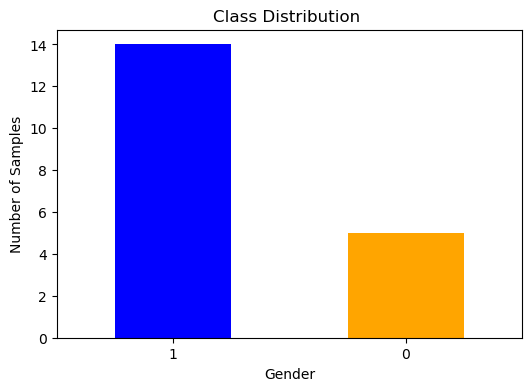

In [4]:
# Encode gender as a binary variable
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

# Step 2: Plot Class Distribution 
class_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution ')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

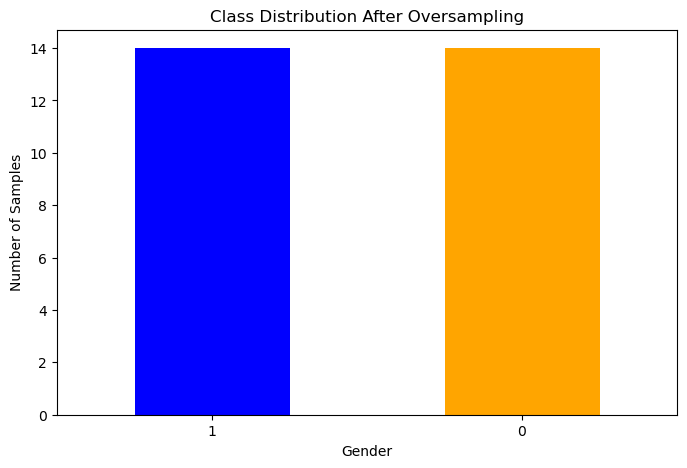

In [5]:
#  Apply Oversampling to the Minority Class
# Separate features and target
X = df.drop(columns=['Gender'])  # Dropping the target column
y = df['Gender']

# Create the RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Gender'] = y_resampled

#  Plot Class Distribution After Oversampling
new_class_counts = df_resampled['Gender'].value_counts()

plt.figure(figsize=(8, 5))
new_class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

### Feature Scaling

It is a preprocessing technique used to standardize the range of independent features (input variables) in a dataset. 

There are two primary types of feature scaling:

1. **Min-Max Scaling (Normalization)**

Min-max scaling, also known as **normalization**, rescales features to a fixed range, usually \([0, 1]\) or \([-1, 1]\). This is useful when we want to bound our features within a specific range.

**Equation:**

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Where:
- $x$ is the original value of the feature.
- $x_{\min}$ is the minimum value of the feature.
- $x_{\max}$ is the maximum value of the feature.
- $x'$ is the normalized value.

**Example:**
If a feature has a range of values from 10 to 100, and we want to normalize the value 50:

$$
x' = \frac{50 - 10}{100 - 10} = \frac{40}{90} \approx 0.44
$$


#### 2. **Z-score Scaling (Standardization)**

Z-score scaling, or **standardization**, transforms the features so that they have a mean of 0 and a standard deviation of 1. This ensures that features are centered around the mean and that the spread of the features is the same (unit variance). It Suitable for models that assume normally distributed data, like logistic regression, linear regression, and SVMs.

**Equation:**

$$
x' = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ is the original feature value.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.
- $x'$ is the standardized value.

**Example:**
If a feature has a mean of 50 and a standard deviation of 10, and the original value of a feature is 70:

$$
x' = \frac{70 - 50}{10} = \frac{20}{10} = 2
$$

In [20]:
# Split the data into training, validation, and test sets using X_resampled, y_resampled
3 TO DO

# Step 4: Feature Scaling using MinMaxScaler on X values
scaler = MinMaxScaler()
# TO DO

# find the best value of k using validation set
k_values = [2, 3, 5, 7, 9, 11]
validation_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Fit on the training set
    y_val_pred = knn.predict(X_val)  # Predict on the validation set
    validation_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(validation_accuracy)

best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best k from validation set: {best_k}")

Best k from validation set: 2


In [15]:
####k-NN Classification
k =   # enter the value you abtain with validation set
knn = KNeighborsClassifier(n_neighbors=k)
# TO DO, Fit the model here on train set

#  Make Predictions on train and test sets
# TO DO

## Metric for Evaluation

We can use some common metric for evaluation like

- **Accuracy**: The proportion of correctly classified instances.
 
   $$
   \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
  $$
  
- **Confusion Matrix**: A summary of prediction results showing true positive, true negative, false positive, and false negative counts.
 
 $$
   \begin{array}{|c|c|c|}
   \hline
   & \text{Predicted Positive} & \text{Predicted Negative} \\
   \hline
   \text{Actual Positive} & TP & FN \\
   \hline
   \text{Actual Negative} & FP & TN \\
   \hline
   \end{array}
  $$


We also have anothers metrics like:

 **Precision**:
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

 **Recall**:
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

 **F1 Score**:
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$


Test Accuracy: 0.80
Train Accuracy: 1.00


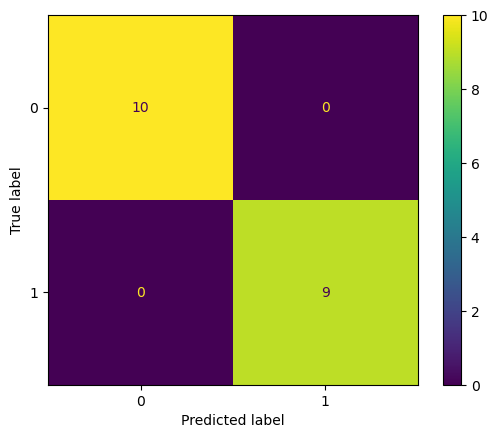

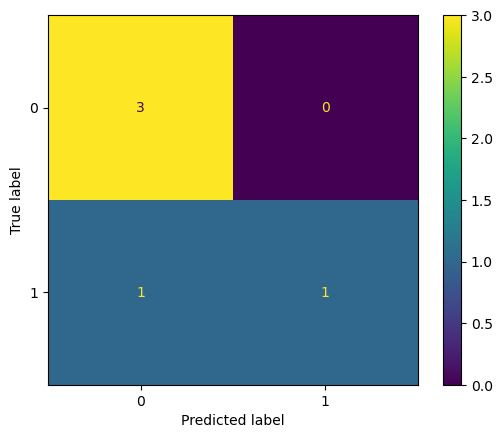

In [12]:
## Compute accuracy using accuracy_score from scikitlearn 
#TO DO

# Print formatted accuracy
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Train Accuracy: {train_accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
cmt = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cmt).plot()
ConfusionMatrixDisplay(cm).plot()
plt.show()